In [1]:
from kaggle_handler import handler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
plt.style.use('ggplot')

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Function Transformer

    This is used to perform mathematical transformation in the data to achive a normally or close to normally distributed data
- ### Techniques used:
  - Log Transformation (use in right skewed distribution)
  - Recipro Transformation
  - Square / Square Root Transformation
  - Custom Transformation

# Downloading/Importing Dataset

In [3]:
Assets = handler('yasserh/titanic-dataset')

Directory 'Assets' already exists.
Datasets already exist in Assets folder
['.ipynb_checkpoints', 'Titanic-Dataset.csv', 'GenZ_DatingApp_Data.csv']
 Change Add_more parameter to download more datasets


In [4]:
Assets

['.ipynb_checkpoints', 'Titanic-Dataset.csv', 'GenZ_DatingApp_Data.csv']

In [5]:
df = pd.read_csv('Assets/Titanic-Dataset.csv',
                 usecols=['Age','Fare','Survived'],
                 dtype={'Age':np.float32, 'Fare':np.float32, 'Servived':np.int32})
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.250000
1,1,38.0,71.283302
2,1,26.0,7.925000
3,1,35.0,53.099998
4,0,35.0,8.050000


In [6]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(df.Age.mean())

# Spliting Dataset

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 2), (712,), (179, 2), (179,))

In [10]:
X_train.head(2)

,Age,Fare
688,18.0,7.7958
136,19.0,26.2833


# Checking Skewness of Dataset
- Pandas 'skew()' finction
- Histogram, KDE Plot
- QQ-Plot

In [11]:
X_train['Age'].skew(), X_train['Fare'].skew()

(np.float32(0.4049771), np.float32(4.730705))

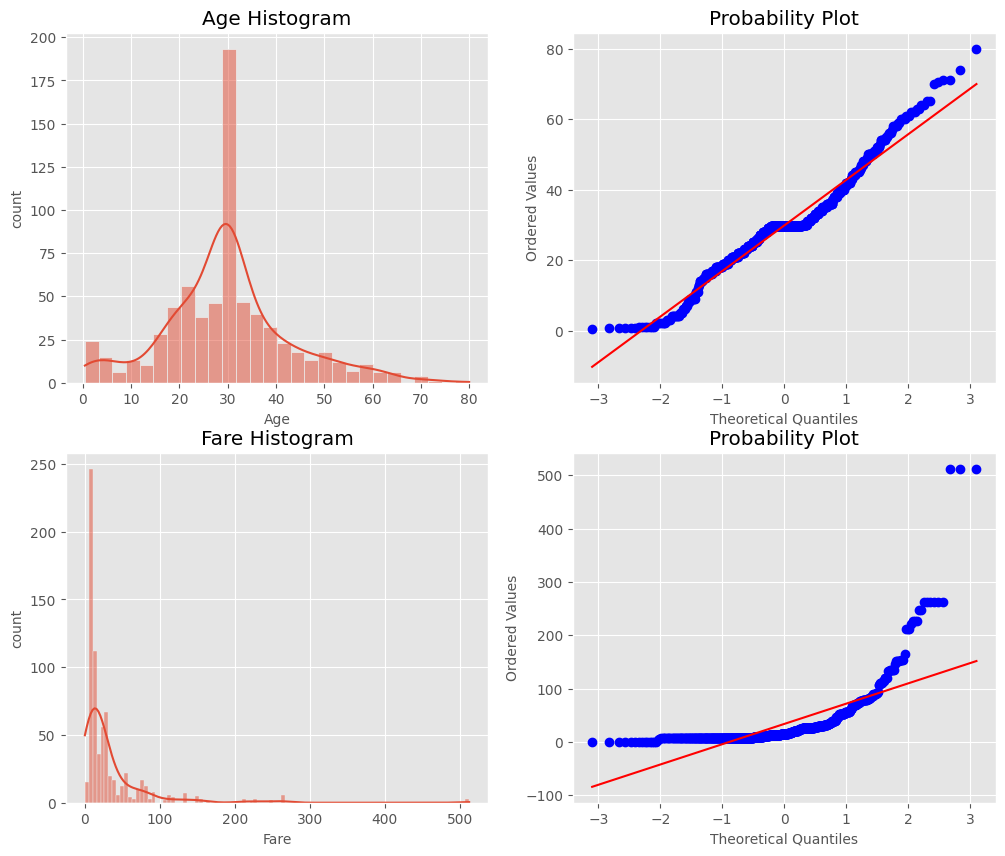

In [12]:
plt.figure(figsize=(12,10))
count = 1
for i, col in enumerate(X_train.columns):
    plt.subplot(2,2,i+count)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'{col} Histogram')
    plt.xlabel(col,fontsize=10)
    plt.ylabel('count',fontsize=10)

    
    plt.subplot(2,2,i+count+1)
    probplot(X_train[col],dist='norm',plot=plt)
    plt.xlabel('Theoretical Quantiles',fontsize=10)
    plt.ylabel('Ordered Values',fontsize=10)
    count += 1
plt.show()

# Treaning Model Before Transformation

In [13]:
lg = LogisticRegression()
dtc = DecisionTreeClassifier()

lg.fit(X_train,y_train)
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

# Accuracy Score Before Transformation

In [14]:
pred_lg = lg.predict(X_test)
pred_dtc = dtc.predict(X_test)

print(f'Accuracy LG: {accuracy_score(y_true=y_test, y_pred=pred_lg)}')
print(f'Accuracy DTC: {accuracy_score(y_true=y_test, y_pred=pred_dtc)}')

Accuracy LG: 0.6983240223463687
Accuracy DTC: 0.6033519553072626


# Diclaring/Appling Transformer
- FunctionTransformer

In [15]:
trf = FunctionTransformer(np.log1p)

In [16]:
X_train_log = trf.fit_transform(X_train)
X_test_log = trf.transform(X_test)

# Checking Skewness of Dataset after Transformation
- Pandas 'skew()' finction
- Histogram, KDE Plot
- QQ-Plot

In [17]:
X_train_log['Age'].skew(), X_train_log['Fare'].skew()

(np.float32(-2.2148244), np.float32(0.31768653))

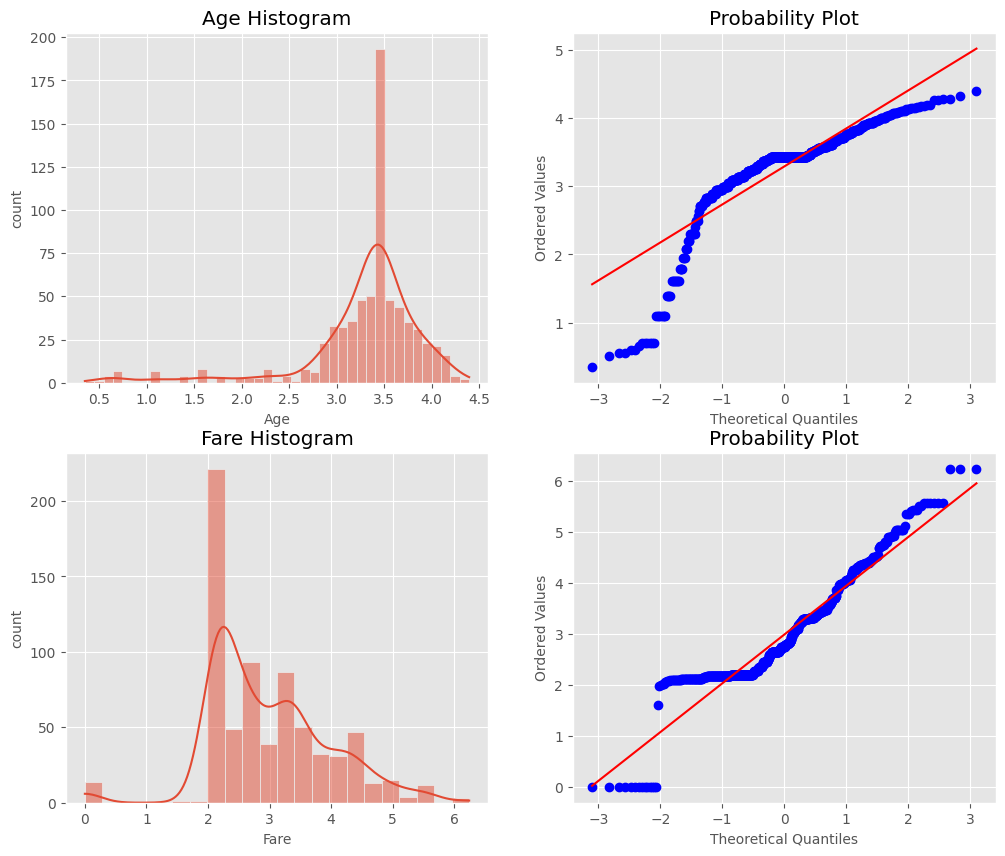

In [18]:
plt.figure(figsize=(12,10))
count = 1
for i, col in enumerate(X_train_log.columns):
    plt.subplot(2,2,i+count)
    sns.histplot(X_train_log[col], kde=True)
    plt.title(f'{col} Histogram')
    plt.xlabel(col,fontsize=10)
    plt.ylabel('count',fontsize=10)

    
    plt.subplot(2,2,i+count+1)
    probplot(X_train_log[col],dist='norm',plot=plt)
    plt.xlabel('Theoretical Quantiles',fontsize=10)
    plt.ylabel('Ordered Values',fontsize=10)
    count += 1
plt.show()

# Treaning Model After Transformation

In [19]:
lg = LogisticRegression()
dtc = DecisionTreeClassifier()

lg.fit(X_train_log,y_train)
dtc.fit(X_train_log,y_train)

DecisionTreeClassifier()

# Accuracy Score After Transformation

In [20]:
pred_lg = lg.predict(X_test_log)
pred_dtc = dtc.predict(X_test_log)

print(f'Accuracy LG: {accuracy_score(y_true=y_test, y_pred=pred_lg)}')
print(f'Accuracy DTC: {accuracy_score(y_true=y_test, y_pred=pred_dtc)}')

Accuracy LG: 0.6871508379888268
Accuracy DTC: 0.5977653631284916


# Cross Validation Of Scores After Transformation

In [21]:
X_transformed = trf.fit_transform(X)

lg = LogisticRegression()
dtc = DecisionTreeClassifier()

print(f'Accuracy Mean LG: {np.mean(cross_val_score(lg,X=X_transformed,y=y,cv=10))}')
print(f'Accuracy Mean DTC: {np.mean(cross_val_score(dtc,X=X_transformed,y=y,cv=10))}')

Accuracy Mean LG: 0.678027465667915
Accuracy Mean DTC: 0.663358302122347


# Appling Transformation Only On "Fare" And Cross Validating Accuracy

In [22]:
trf2 = ColumnTransformer(transformers=[('ftrf',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_transformed = trf2.fit_transform(X)

lg = LogisticRegression()
dtc = DecisionTreeClassifier()

print(f'Accuracy Mean LG: {np.mean(cross_val_score(lg,X=X_transformed,y=y,cv=10))}')
print(f'Accuracy Mean DTC: {np.mean(cross_val_score(dtc,X=X_transformed,y=y,cv=10))}')

Accuracy Mean LG: 0.6712609238451936
Accuracy Mean DTC: 0.6610986267166042


# Creating Function

    This Function is being created to try out difrent combinations of logics for column 'Age' & 'Fare' at the same time, and to compare the performance of the model trained with it. It also gives the visual representation of transformation of the distribution

In [23]:
def Apply_FunctionTransformer(X,y,Age_logic=None,Fare_logic=None):
    trf = ColumnTransformer(transformers=[('ftrf1',FunctionTransformer(Age_logic),['Age']),
                                         ('ftrf2',FunctionTransformer(Fare_logic),['Fare'])],
                            remainder='passthrough')
    
    X_train = trf.fit_transform(X)
    lg = LogisticRegression()
    dtc = DecisionTreeClassifier()

    print(f'Accuracy Mean Before Transformation LG: {np.mean(cross_val_score(lg,X=X,y=y,cv=10))}')
    print(f'Accuracy Mean Before Transformation DTC: {np.mean(cross_val_score(dtc,X=X,y=y,cv=10))}', end='\n\n')
    print(f'Accuracy Mean After Transformation LG: {np.mean(cross_val_score(lg,X=X_train,y=y,cv=10))}')
    print(f'Accuracy Mean After Transformation DTC: {np.mean(cross_val_score(dtc,X=X_train,y=y,cv=10))}')

    if Age_logic != None:
        plt.figure(figsize=(12,5))
        plt.subplot(121)
        probplot(X['Age'],dist='norm',plot=plt)
        plt.title('Age QQ-Plot Before Logic')
        
        plt.subplot(122)
        probplot(X_train[:,0],dist='norm',plot=plt)
        plt.title('Age QQ-Plot After Logic')
        plt.show()
        
    if Fare_logic != None:
        plt.figure(figsize=(12,5))
        plt.subplot(121)
        probplot(X['Fare'],dist='norm',plot=plt)
        plt.title('Fare Histplot Before Logic')
        
        plt.subplot(122)
        probplot(X_train[:,1],dist='norm',plot=plt)
        plt.title('Fare QQ-Plot After Logic')
        plt.show()
    

Accuracy Mean Before Transformation LG: 0.6589013732833957
Accuracy Mean Before Transformation DTC: 0.6566042446941324

Accuracy Mean After Transformation LG: 0.6768789013732833
Accuracy Mean After Transformation DTC: 0.6532584269662922


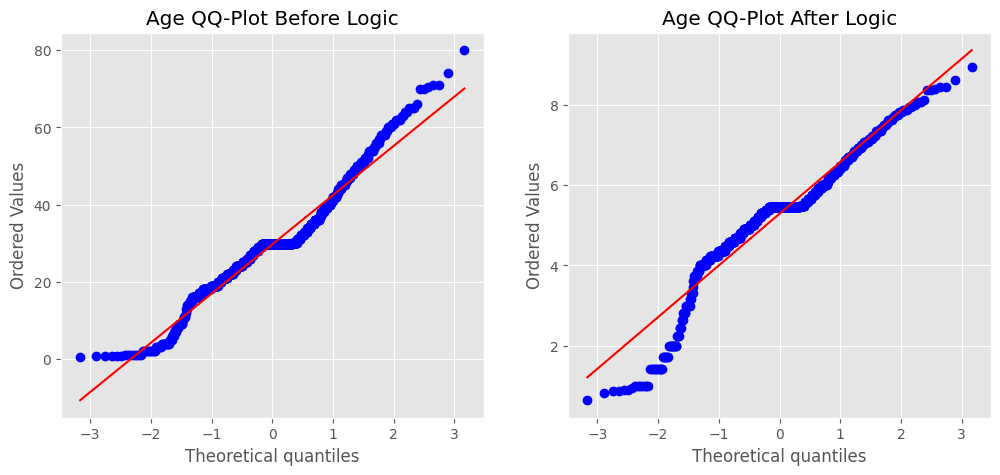

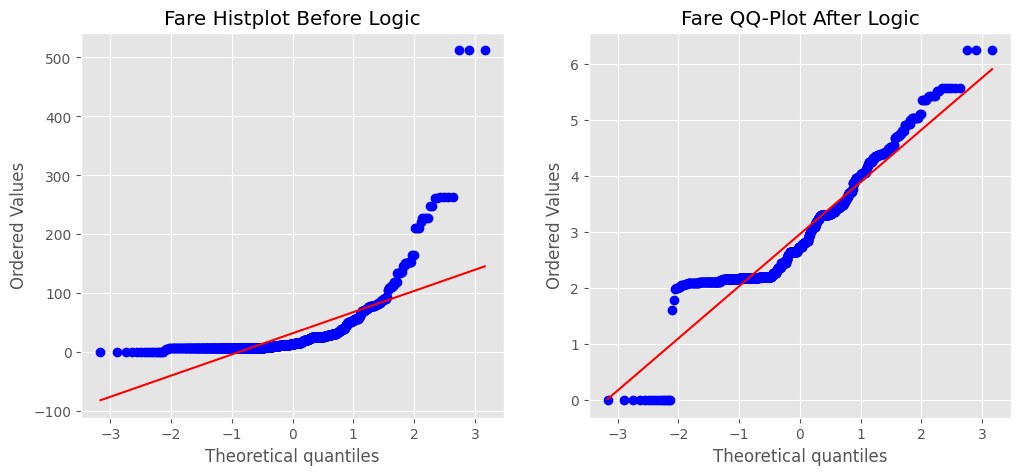

In [24]:
Apply_FunctionTransformer(X,y,Fare_logic=np.log1p,Age_logic=lambda x:x**(1/2))